# Intro
In this project, we will predict whether the lending company can get the payment from the borrower or not by deep learning using keras.

## The Data

We will be using a subset of the LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club

LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California. It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

### Our Goal

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), can we build a model thatcan predict wether or nor a borrower will pay back their loan? This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan.

The "loan_status" column contains our label.

### Data Overview

----
-----
There are many LendingClub data sets on Kaggle. Here is the information on this particular data set:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>The number of payments on the loan. Values are in months and can be either 36 or 60.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Interest Rate on the loan</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>The monthly payment owed by the borrower if the loan originates.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>LC assigned loan grade</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>LC assigned loan subgrade</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>The job title supplied by the Borrower when applying for the loan.*</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>The self-reported annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Indicates if income was verified by LC, not verified, or if the income source was verified</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>The month which the loan was funded</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Current status of the loan</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>A category provided by the borrower for the loan request.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>The loan title provided by the borrower</td>
    </tr>
    <tr>
      <th>15</th>
      <td>zip_code</td>
      <td>The first 3 numbers of the zip code provided by the borrower in the loan application.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>addr_state</td>
      <td>The state provided by the borrower in the loan application</td>
    </tr>
    <tr>
      <th>17</th>
      <td>dti</td>
      <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
    </tr>
    <tr>
      <th>18</th>
      <td>earliest_cr_line</td>
      <td>The month the borrower's earliest reported credit line was opened</td>
    </tr>
    <tr>
      <th>19</th>
      <td>open_acc</td>
      <td>The number of open credit lines in the borrower's credit file.</td>
    </tr>
    <tr>
      <th>20</th>
      <td>pub_rec</td>
      <td>Number of derogatory public records</td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_bal</td>
      <td>Total credit revolving balance</td>
    </tr>
    <tr>
      <th>22</th>
      <td>revol_util</td>
      <td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td>
    </tr>
    <tr>
      <th>23</th>
      <td>total_acc</td>
      <td>The total number of credit lines currently in the borrower's credit file</td>
    </tr>
    <tr>
      <th>24</th>
      <td>initial_list_status</td>
      <td>The initial listing status of the loan. Possible values are – W, F</td>
    </tr>
    <tr>
      <th>25</th>
      <td>application_type</td>
      <td>Indicates whether the loan is an individual application or a joint application with two co-borrowers</td>
    </tr>
    <tr>
      <th>26</th>
      <td>mort_acc</td>
      <td>Number of mortgage accounts.</td>
    </tr>
    <tr>
      <th>27</th>
      <td>pub_rec_bankruptcies</td>
      <td>Number of public record bankruptcies</td>
    </tr>
  </tbody>
</table>

---
----

## Reading in info data and other imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# might be needed depending on your version of Jupyter
%matplotlib inline

In [2]:
data_info = pd.read_csv('../DATA/lending_club_info.csv',index_col='LoanStatNew')
print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [3]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [4]:
feat_info('mort_acc')

Number of mortgage accounts.


In [5]:
df = pd.read_csv('../DATA/lending_club_loan_two.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

# Section 1: Exploratory Data Analysis

**OVERALL GOAL: Get an understanding for which variables are important, view summary statistics, and visualize the data**


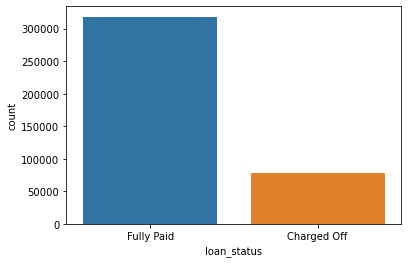

In [7]:
#Start with countplot to see the balancing of the value
sns.countplot(x='loan_status',data=df)

We can see it is unbalanced problem. We can see there are much more Fully Paid then Charged Off.

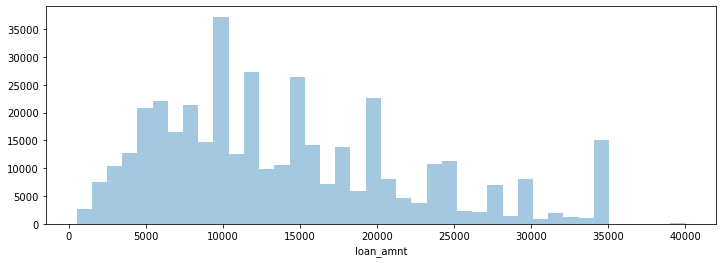

In [8]:
plt.figure(figsize=(12,4))
sns.distplot(df['loan_amnt'],kde=False, bins=40)

From the histogram, we can see spikes at even money for example, 10,000, 15,000 and 20,000. There should be certain amount which is standard loan

Let's explore correlation between the continuous feature variables.

In [9]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


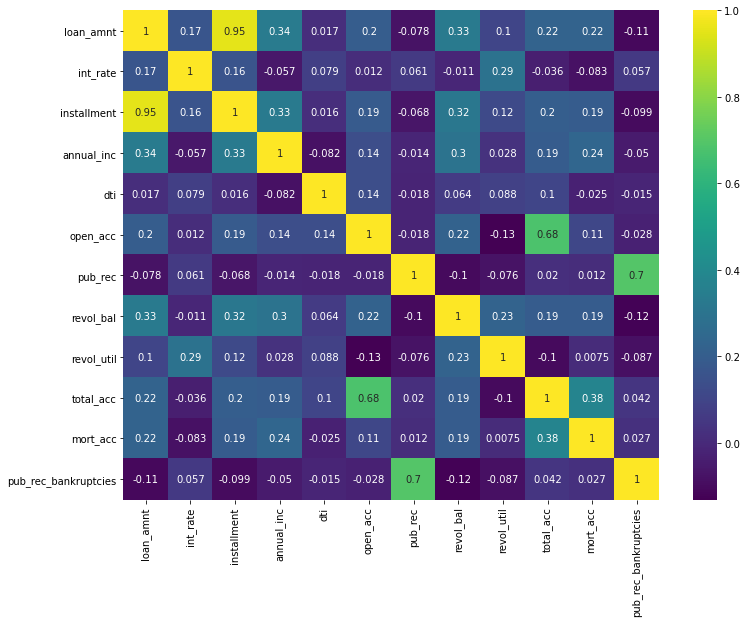

In [10]:
plt.figure(figsize=(12,9))
sns.heatmap(df.corr(),annot=True,cmap='viridis')

**From heatmap, we can noticed almost perfect correlation with the "installment" feature. We need to explore this feature further. We want to make sure we are not leaking data into feature.**

In [11]:
feat_info("installment")

The monthly payment owed by the borrower if the loan originates.


In [12]:
feat_info('loan_amnt')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


We can see there is some relationship between the loan_amnt and installment, since if loan_amnt is high, installment also needs to be high.

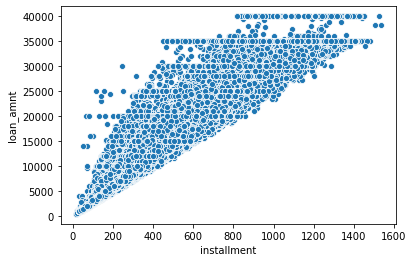

In [13]:
sns.scatterplot(x='installment',y='loan_amnt',data=df)

Let's check is there relationship of loan_amnt and loan_status

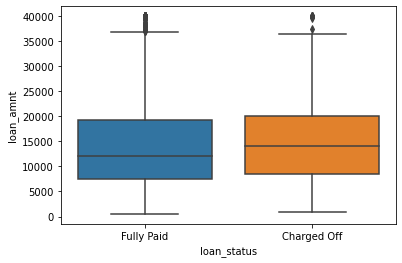

In [14]:
sns.boxplot(x='loan_status',y='loan_amnt',data=df)

In general, they look similar. There is slight different. Charged off has little higher loan_amnt but not significant. It also can be seen from the table below.

In [15]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


Let's explore the Grand and SubGrade columns that lendingclub attributes to the loans. 

In [16]:
df['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [17]:
df['sub_grade'].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

We can see sub_grade has information from grade. Now we check the loan_status for each grade.

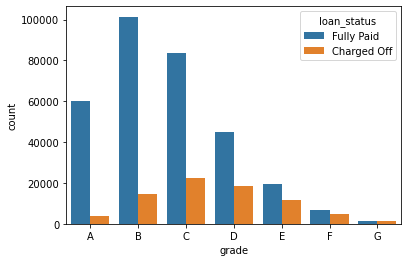

In [18]:
sns.countplot(x='grade',data=df,hue='loan_status',order=['A','B','C','D','E','F','G'])

Percentage of charged off from same grade group is increasing as the letter grade gets higher.

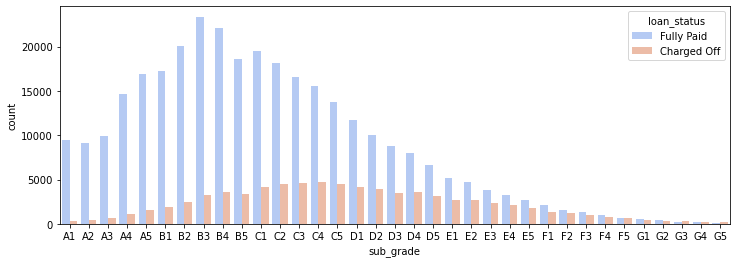

In [19]:
plt.figure(figsize=(12,4))
subgrade_order=sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,order=subgrade_order, palette="coolwarm"
             ,hue='loan_status')

**It looks like F and G subgrades don't get paid back that often. So, isolate those and recreate the countplot just for those subgrades.**

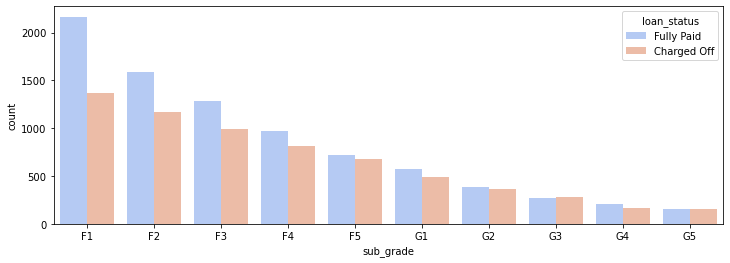

In [20]:
f_and_g = df[(df['grade']=='G') | (df['grade']=='F')]

plt.figure(figsize=(12,4))
subgrade_order=sorted(f_and_g['sub_grade'].unique())
sns.countplot(x='sub_grade',data=f_and_g,order=subgrade_order, palette="coolwarm"
             ,hue='loan_status')

In this zoomed in graph of F, and G grades, you can see that at G5, Fully paid is almost same as charged off.

In [21]:
#Create new column loan_repaid which has 1 for fully paid and 0 for charged off
df['loan_repaid'] = df['loan_status'].map({'Fully Paid':1,'Charged Off':0})

In [22]:
df[['loan_repaid','loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


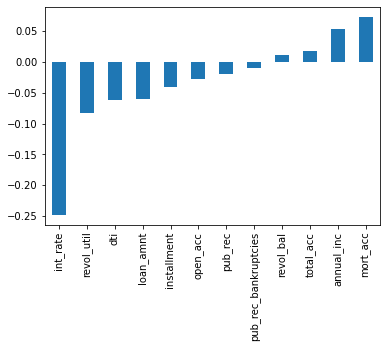

In [23]:
#visualize the correlation by loan_repaid and see which column is more correlated
df.corr()['loan_repaid'][:-1].sort_values().plot(kind='bar')

## Section 2: Data PreProcessing

Section Goals: Remove or fill any missing data. Remove unnecessary or repetitive features. Convert categorical string features to dummy variables.

### Missing data

In [24]:
len(df)

396030

In [25]:
#get the percentage of missing data for each column
df.isnull().sum() / len(df) * 100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

mort_acc is hard to drop because it is missing almost 10% but other minor missing datas might be okay to drop them. Let's check emp_title and emp_length to see whether it will be okay to drop them.

In [26]:
feat_info('emp_title')

The job title supplied by the Borrower when applying for the loan.*


In [27]:
feat_info('emp_length')

Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


In [28]:
df['emp_title'].nunique()

173105

In [29]:
df['emp_title'].value_counts()

Teacher                                4389
Manager                                4250
Registered Nurse                       1856
RN                                     1846
Supervisor                             1830
                                       ... 
CAl Fire                                  1
Internal Sales Associate                  1
Senior Accountant/Financial Analyst       1
Mcbride construction resources inc.       1
Senior Managing Partner                   1
Name: emp_title, Length: 173105, dtype: int64

There are too many titles to convert all of these to dummy variables for machine learning. Maybe we can categorizing to map to reduce the numbers but for now, we can remove the column.

In [30]:
df = df.drop('emp_title',axis=1)

In [31]:
#check the unique values
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [32]:
employ_length_order = ['< 1 year','1 year',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
'10+ years']

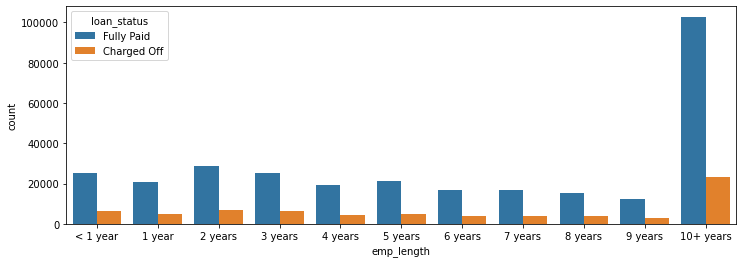

In [33]:
#Let's check the emp_length column
plt.figure(figsize=(12,4))
sns.countplot(x='emp_length',data=df,order=employ_length_order, hue='loan_status')

Quite the majority of people work for more than 10 years. And relationship between fully paid off and charged off seems same for all emp_length. But we can check the ratio of percentage charged off to actually check the numbers.

In [34]:
emp_co = df[df['loan_status']=='Charged Off'].groupby('emp_length').count()['loan_status']

In [35]:
emp_fp = df[df['loan_status']=='Fully Paid'].groupby('emp_length').count()['loan_status']

In [36]:
emp_co / (emp_fp+emp_co)

emp_length
1 year       0.199135
10+ years    0.184186
2 years      0.193262
3 years      0.195231
4 years      0.192385
5 years      0.192187
6 years      0.189194
7 years      0.194774
8 years      0.199760
9 years      0.200470
< 1 year     0.206872
Name: loan_status, dtype: float64

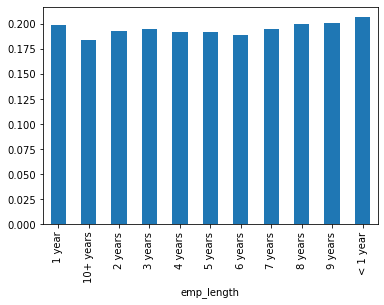

In [37]:
(emp_co / (emp_fp+emp_co)).plot(kind='bar')

We can see here, it looks to be extremely similar. Most of them are between .18 to .20. So, we can conclude emp_length is not doing much to loan_status. So, we can drop this column.

In [38]:
df = df.drop('emp_length',axis=1)

In [39]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [40]:
feat_info('title')

The loan title provided by the borrower


In [41]:
df['title'].head()

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
Name: title, dtype: object

Title column is categorical column and it contains similar or same information to purpose column. So we can drop the title column

In [42]:
df = df.drop('title',axis=1)

In [43]:
feat_info('mort_acc')

Number of mortgage accounts.


In [44]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
32.0         2
26.0         2
31.0         2
30.0         1
28.0         1
34.0         1
Name: mort_acc, dtype: int64

It looks like majority of people have 0 mortgage account. And almost 10% of data is missing for this column. So, it is not a good idea to drop 10% of our data. There is many ways to fill in the data but we will try to find out the column that is mostly correlated to mort_acc column.

In [45]:
df.corr()['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

Looks like the total_acc feature correlates with the mort_acc, this makes sense. Let's try to fillna. We will group the dataframe by the total_acc and calculate the mean value for the mort_acc per total_acc entry.

In [46]:
total_acc_avg = df.dropna().groupby('total_acc')['mort_acc'].mean()

In [47]:
#We will fill in missing values using mean value in total_acc_avg

In [48]:
def fill_mort_acc(total_acc,mort_acc):
    
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [49]:
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'],x['mort_acc']),axis=1)

In [50]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

Now we got mort_acc missing data cleaned. We have missing values at revol_util and pub_rec_bankruptcies but we will just drop these since the size of missing data is small.

In [51]:
df=df.dropna()

In [52]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

**Now we got all data cleaned**

### Categorical data
Go over each of categorical columns and decide what to do.

In [53]:
#string columns
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [54]:
feat_info('term')

The number of payments on the loan. Values are in months and can be either 36 or 60.


In [55]:
df['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [56]:
#We will map this to 36 to 60 and integer.
df['term'] = df['term'].apply(lambda term: int(term[:3]))

In [57]:
df['term'].value_counts()

36    301247
60     93972
Name: term, dtype: int64

In [58]:
#We know grade is part of sub_grade so we can drop the grade.
df = df.drop('grade',axis=1)

In [59]:
#Convert sub_grade column to dummy variables and drop first to prevent duplication of information
dummies = pd.get_dummies(df['sub_grade'],drop_first=True)
#concat dummies to df with dropping the original column
df = pd.concat([df.drop('sub_grade',axis=1),dummies],axis=1)

In [60]:
#df.columns

In [61]:
#We can do the same thing to verification_status, 
#application_type, initial_list_status, and purpose
dummies = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose']],drop_first=True)

df = pd.concat([df.drop(['verification_status', 'application_type','initial_list_status','purpose'],axis=1),dummies],axis=1)

In [62]:
#We need to review the values for home ownership
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [63]:
#There is so few people at NONE and ANY. We can change this to OTHERS so we have fewer features.
df['home_ownership'] = df['home_ownership'].replace(['NONE','ANY'],'OTHER')

In [64]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: home_ownership, dtype: int64

In [65]:
#Now we change home_ownership to dummy variable
dummies = pd.get_dummies(df['home_ownership'],drop_first=True)

df = pd.concat([df.drop('home_ownership',axis=1),dummies],axis=1)

In [66]:
#Address column 
df['address'].head()

0       0174 Michelle Gateway\nMendozaberg, OK 22690
1    1076 Carney Fort Apt. 347\nLoganmouth, SD 05113
2    87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113
3              823 Reid Ford\nDelacruzside, MA 00813
4               679 Luna Roads\nGreggshire, VA 11650
Name: address, dtype: object

In [67]:
#Address is the full address but we can extract only zipcodes to create new column
df['zipcode'] = df['address'].apply(lambda address: address[-5:])

In [68]:
df['zipcode'].value_counts()

70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: zipcode, dtype: int64

In [69]:
dummies = pd.get_dummies(df['zipcode'],drop_first=True)

df = pd.concat([df.drop('zipcode',axis=1),dummies],axis=1)

In [70]:
df = df.drop('address',axis=1)

In [71]:
#issue_d
feat_info('issue_d')

The month which the loan was funded


**In reality, we want to check whether or not a loan would be issued so, we wouldn't have an issue_date. We are checking this before we issue the loan so we can drop this column.**

In [72]:
df=df.drop('issue_d',axis=1)

In [73]:
#earliest_cr_line - we will change this to only contain year value in integer
feat_info('earliest_cr_line')

The month the borrower's earliest reported credit line was opened


In [74]:
df['earliest_cr_line'].head()

0    Jun-1990
1    Jul-2004
2    Aug-2007
3    Sep-2006
4    Mar-1999
Name: earliest_cr_line, dtype: object

In [75]:
df['earliest_cr_line'] = df['earliest_cr_line'].apply(lambda date:int(date[-4:]))

In [76]:
df['earliest_cr_line'].value_counts()

2000    29302
2001    29031
1999    26444
2002    25849
2003    23623
        ...  
1951        3
1950        3
1953        2
1948        1
1944        1
Name: earliest_cr_line, Length: 65, dtype: int64

### Preprocessing - Train Test Split and Normalize

Now, we are done with categorical data columns. So, we can go ahead and use train test split to split the data to train set and test set.

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
#We can drop loan_status since loan_repaid column contains same information in 0s and 1s.
df = df.drop('loan_status', axis=1)

In [79]:
X = df.drop('loan_repaid',axis=1).values
y = df['loan_repaid'].values

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [81]:
from sklearn.preprocessing import MinMaxScaler

In [82]:
scaler = MinMaxScaler()

In [83]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Create model
Now we done with separating data to train test set and normalize the data. Now we can create the model to fit.

In [84]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [85]:
X_train.shape

(316175, 78)

We can build a deep learning model with 78 neurons at first since there is 78 features, then drop down by half with 4 total layers so, 78 -> 39 -> 19 -> 1 output neuron which predict the loan_repaid.

In [86]:
model = Sequential()

model.add(Dense(78,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(39,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(19,activation='relu'))
model.add(Dropout(0.2))

#sigmoid for binary classification
model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [87]:
#Fit the model
model.fit(x=X_train, y=y_train, epochs = 25, batch_size=256,
         validation_data=(X_test,y_test))

Epoch 1/25
1236/1236 [==============================] - 2s 2ms/step - loss: 0.3033 - val_loss: 0.2654
Epoch 2/25
1236/1236 [==============================] - 2s 2ms/step - loss: 0.2666 - val_loss: 0.2630
Epoch 3/25
1236/1236 [==============================] - 2s 2ms/step - loss: 0.2636 - val_loss: 0.2622
Epoch 4/25
1236/1236 [==============================] - 2s 2ms/step - loss: 0.2622 - val_loss: 0.2621
Epoch 5/25
1236/1236 [==============================] - 2s 2ms/step - loss: 0.2610 - val_loss: 0.2619
Epoch 6/25
1236/1236 [==============================] - 2s 2ms/step - loss: 0.2604 - val_loss: 0.2617
Epoch 7/25
1236/1236 [==============================] - 2s 2ms/step - loss: 0.2599 - val_loss: 0.2616
Epoch 8/25
1236/1236 [==============================] - 2s 2ms/step - loss: 0.2596 - val_loss: 0.2615
Epoch 9/25
1236/1236 [==============================] - 2s 2ms/step - loss: 0.2593 - val_loss: 0.2620
Epoch 10/25
1236/1236 [==============================] - 2s 2ms/step - loss: 0.258

### Evaluation
Now we got our model fit, so we need to evaluate the model's performance

In [88]:
#save the model for later use
from tensorflow.keras.models import load_model

In [89]:
model.save('mymodel.h5')

In [90]:
losses = pd.DataFrame(model.history.history)

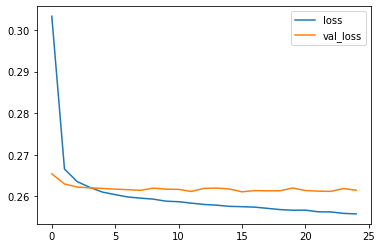

In [91]:
losses.plot()

In [92]:
from sklearn.metrics import classification_report, confusion_matrix

In [93]:
predictions = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [94]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.44      0.61     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.93      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



In [95]:
print(confusion_matrix(y_test,predictions))

[[ 6930  8728]
 [  155 63231]]


## Conclusion
Accuracy in the classification report means how much we got right. Despite the unbalanced data set with much more Fully Paid, we still got okay score on the accuracy. By default, we can get 80% accuracy if our model says everything got repaid, and we got 89% of accuracy which is not so great but okay. It can be from imbalance the dataset has. If we look at precision, recall, and f1-score, we can say that the information we want to find which is related to 0 which means it will not be repaid, recall is too low and f1-score also is low to be a good prediction. For next step, we can add more layer, edit hyperparameter, or we can add early stoppoint to improve the model.

In [96]:
#Test the model with random customer
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt      25000.00
term              60.00
int_rate          18.24
installment      638.11
annual_inc     61665.00
                 ...   
30723              1.00
48052              0.00
70466              0.00
86630              0.00
93700              0.00
Name: 305323, Length: 78, dtype: float64

In [97]:
new_customer=scaler.transform(new_customer.values.reshape(1,78))

In [98]:
model.predict_classes(new_customer)

array([[1]])

In [99]:
df.iloc[random_ind]['loan_repaid']

1.0

It looks like in this particular case, we got the prediction right.